# Obtain all necessary imports

In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import random
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd

from numpy import dot, multiply, diag, power
from matplotlib.animation import FuncAnimation
from matplotlib import colors
from matplotlib import animation
from IPython.display import display, HTML

# Establish simulation parameters to replicate four calcium patterns
### NOTE:
All wings are 'large' wings where the only difference in simulation parameters is the increasing range of $V_{PLC}$ values for standby cells. Initiator cells are the same for each simulation, which is determined by the same random number generator seed.

In [19]:
sim_params_Spikes={'K_PLC': 0.2, 'K_5':0.66, 'k_1':1.11 , 'k_a': 0.08, 'k_p':0.13, 'k_2':0.0203, 'V_SERCA':0.9, 'K_SERCA':0.1,
            'c_tot':2, 'beta':.185, 'k_i':0.4, 'D_p':0.005, 'tau_max':800, 'k_tau':1.5, 'lower':0.1, 'upper':0.5,'frac':0.007680491551459293, 'D_c_ratio':0.1}

sim_params_ICT={'K_PLC': 0.2, 'K_5':0.66, 'k_1':1.11 , 'k_a': 0.08, 'k_p':0.13, 'k_2':0.0203, 'V_SERCA':0.9, 'K_SERCA':0.1,
            'c_tot':2, 'beta':.185, 'k_i':0.4, 'D_p':0.005, 'tau_max':800, 'k_tau':1.5, 'lower':0.25, 'upper':0.6,'frac':0.007680491551459293, 'D_c_ratio':0.1}

sim_params_ICW={'K_PLC': 0.2, 'K_5':0.66, 'k_1':1.11 , 'k_a': 0.08, 'k_p':0.13, 'k_2':0.0203, 'V_SERCA':0.9, 'K_SERCA':0.1,
            'c_tot':2, 'beta':.185, 'k_i':0.4, 'D_p':0.005, 'tau_max':800, 'k_tau':1.5, 'lower':0.4, 'upper':0.8,'frac':0.007680491551459293, 'D_c_ratio':0.1}

sim_params_Fluttering={'K_PLC': 0.2, 'K_5':0.66, 'k_1':1.11 , 'k_a': 0.08, 'k_p':0.13, 'k_2':0.0203, 'V_SERCA':0.9, 'K_SERCA':0.1,
            'c_tot':2, 'beta':.185, 'k_i':0.4, 'D_p':0.005, 'tau_max':800, 'k_tau':1.5, 'lower':1.4, 'upper':1.5,'frac':0.007680491551459293, 'D_c_ratio':0.1}

# Create the pouch objects for each calcium pattern

In [20]:
p_Spikes=Pouch(params=sim_params_Spikes, size='xsmall', sim_number=2400, save=True, saveName='Fig_2E_Spikes') 
p_ICT=Pouch(params=sim_params_ICT, size='xsmall', sim_number=2400, save=True, saveName='Fig_2E_ICT') 
p_ICW=Pouch(params=sim_params_ICW, size='xsmall', sim_number=2400, save=True, saveName='Fig_2E_ICW') 
p_Fluttering=Pouch(params=sim_params_Fluttering, size='xsmall', sim_number=2400, save=True, saveName='Fig_2E_Fluttering') 

# Run simulations for each of the calcium patterns

In [21]:
p_Spikes.simulate()

In [22]:
p_ICT.simulate()

In [23]:
p_ICW.simulate()

In [24]:
p_Fluttering.simulate()

# Create dataframe for plotting

In [25]:
df = pd.DataFrame(columns=['vplc', 'category'])
j=0

for v in p_Spikes.VPLC_state:
    df.loc[j]=[v[0],'Spikes']
    j+=1

for v in p_ICT.VPLC_state:
    df.loc[j]=[v[0],'ICT']
    j+=1

for v in p_ICW.VPLC_state:
    df.loc[j]=[v[0],'ICW']
    j+=1
    
for v in p_Fluttering.VPLC_state:
    df.loc[j]=[v[0],'Fluttering']
    j+=1

# $V_{PLC}$ distributions for each calcium pattern

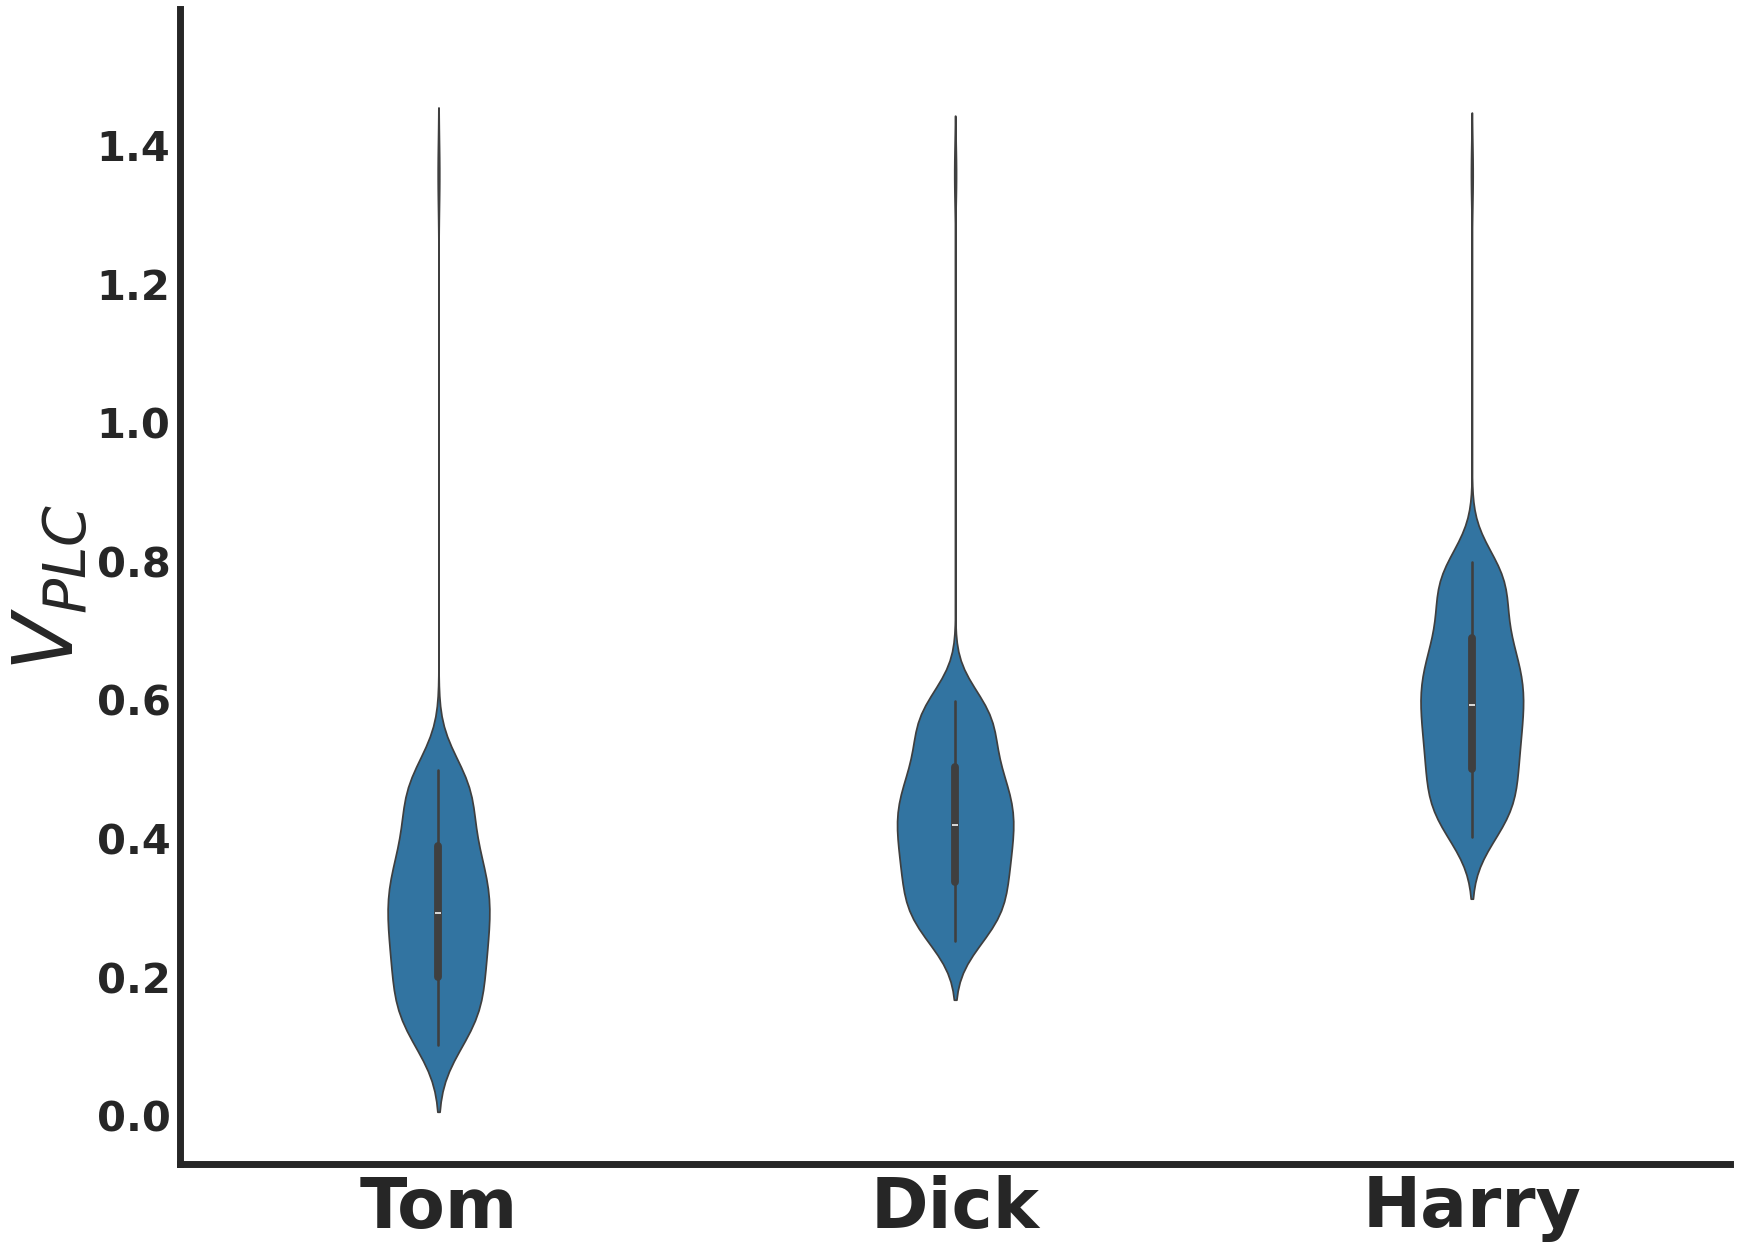

In [26]:
with sns.axes_style("white"):
    fig=plt.figure(figsize=(20,15))
    ax = plt.axes()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(axis='both', which='minor', labelsize=5)
    legend_properties = {'weight':'bold','size':20}
    plt.yticks(fontsize=30, fontweight="bold")
    
    plt.xticks(np.arange(3), ('Tom', 'Dick', 'Harry'),fontsize=50, fontweight="bold")
    plt.ylabel(r'$V_{PLC}$' ,fontsize=50,fontweight='bold')
    plt.xlabel('off')
    sns.violinplot(x="category", y="vplc", data=df)
    ax.set_ylabel(r'$V_{PLC}$',fontsize=60, fontweight="bold")
    ax.set_xlabel('')


saveFolderName = './simulationResults/Figure_2' # The folder where simulation results are to be saved for this notebook
if not os.path.exists(saveFolderName): # Create the folder if it does not yet exist
    os.makedirs(saveFolderName)
    
#fig.savefig(saveFolderName+'/Panel_E',transparent=True)   

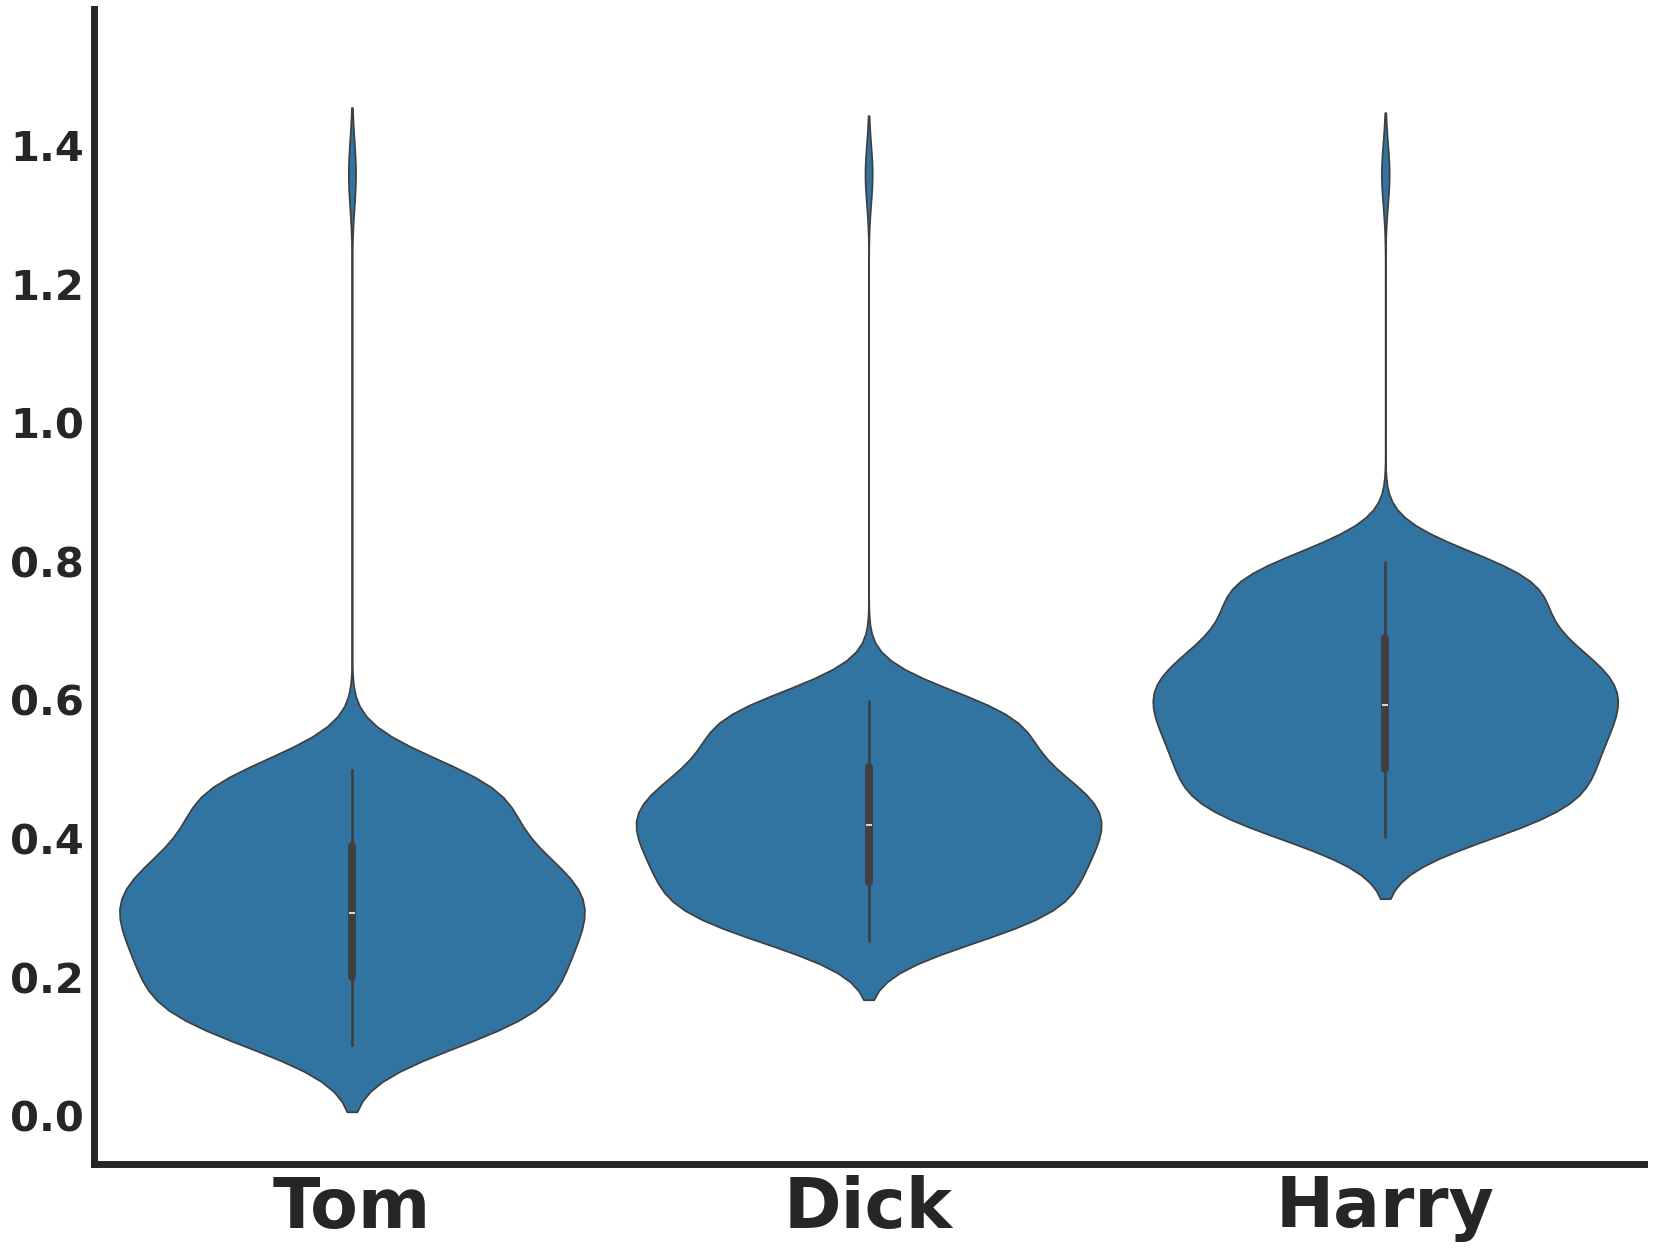

In [27]:
with sns.axes_style("white"):
    fig=plt.figure(figsize=(20,15))
    ax = plt.axes()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(5)
    ax.spines['bottom'].set_linewidth(5)
    ax.tick_params(axis='both', which='minor', labelsize=5)
    legend_properties = {'weight':'bold','size':20}
    plt.yticks(fontsize=30, fontweight="bold")
    
    plt.xticks(np.arange(3), ('Tom', 'Dick', 'Harry'),fontsize=50, fontweight="bold")
    plt.ylabel(r'$V_{PLC}$' ,fontsize=50,fontweight='bold')
    plt.xlabel('off')
    plt.ylabel('off')
    sns.violinplot(x="category", y="vplc", data=df, width=0.9, scale='count')
    ax.set_ylabel(r'$V_{PLC}$',fontsize=60, fontweight="bold")
    ax.set_xlabel('')
    ax.set_ylabel('')

    fig.savefig(saveFolderName+'/Panel_E.pdf',transparent=True)   